# Práctica 4a Multiperceptrón con SciKit-Learn

### Ejercicio 1
Se entrenó una red neuronal multiperceptrón para resolver un problema de clasificación y al medir su
desempeño sobre el conjunto de datos de entrenamiento se obtuvo la siguiente matriz de confusión:

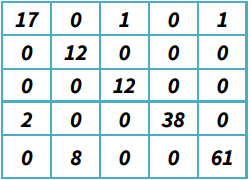

a) En base a esta información, indique:

▪ Cuántos ejemplos se utilizaron en el entrenamiento.

▪ Cuántas clases puede reconocer este multiperceptrón.

▪ Cuál es la precisión (accuracy) de la red sobre el conjunto de ejemplos completo.

▪ Cuáles son los valores de precisión de la red al responder por cada uno de los valores de clase (precision).

▪ Cuáles son los valores de sensibilidad de la red al responder por cada uno de los valores de clase (recall).

In [190]:
confusion_matrix_data = [
    [17, 0, 1, 0, 1],
    [0, 12, 0, 0, 0],
    [0, 0, 12, 0, 0],
    [2, 0, 0, 38, 0],
    [0, 8, 0, 0, 61]
]

In [191]:
# Cuantos ejemplos se usaron (suma de todos los elementos de la matriz de confusión)
# Cuantas clases hay (cantidad de filas de la matriz de confusión)
cant = 0
clases = 0
for fila in confusion_matrix_data:
    cant += sum(fila)
    clases += 1
print("Cantidad de ejemplos usados:", cant)
print("Cantidad de clases:", clases)

Cantidad de ejemplos usados: 152
Cantidad de clases: 5


In [192]:
# Exactitud (accuracy) = suma de los elementos de la diagonal principal / cantidad de ejemplos
accuracy = 0
for i in range(len(confusion_matrix_data)):
    accuracy += confusion_matrix_data[i][i]
accuracy /= cant
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


In [193]:
import numpy as np
# Precision por clase = elementos de la diagonal principal / suma de la columna
precision = np.zeros(clases)
for i in range(0, len(confusion_matrix_data)):
    suma_columna = 0
    for j in range(0, len(confusion_matrix_data)):
        suma_columna += confusion_matrix_data[j][i]
    precision[i] = confusion_matrix_data[i][i] / suma_columna

print("Precision por clase:", precision)

Precision por clase: [0.89473684 0.6        0.92307692 1.         0.98387097]


In [194]:
# Recall por clase = elementos de la diagonal principal / suma de la fila
recall = np.zeros(clases)
for i in range(0, len(confusion_matrix_data)):
    suma_fila = sum(confusion_matrix_data[i])
    recall[i] = confusion_matrix_data[i][i] / suma_fila

print("Recall por clase:", recall)

Recall por clase: [0.89473684 1.         1.         0.95       0.88405797]


Accuracy: Indica qué proporción de las predicciones totales fueron correctas.

Precisión: Mide qué tan confiables son las predicciones positivas.

Recall: Mide qué tan bien el modelo detecta todos los casos reales de una clase.

b) Identifique la clase con el mejor valor de F1-score.

In [195]:
# f1-score por clase = 2 * (precision * recall) / (precision + recall)
f1_score = np.zeros(clases)
for i in range(0, len(confusion_matrix_data)):
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

print("F1-score por clase:", f1_score)

F1-score por clase: [0.89473684 0.75       0.96       0.97435897 0.93129771]


### Ejercicio 2
Se desea utilizar una red multiperceptrón para reconocer muestras de tres variedades diferentes de trigo:
Kama, Rosa y Canadiense. Para entrenarla se utilizará una parte de los ejemplos del archivo
SEMILLAS.CSV. 

a) Con respecto a la arquitectura, indique:

▪ La cantidad de neuronas de la capa de entrada.

▪ La cantidad de neuronas de la capa de salida.

▪ La cantidad de pesos (arcos) que tiene la red si se utiliza una única capa oculta formada por 4
neuronas.


In [196]:
import pandas as pd
df = pd.read_csv('semillas.csv')

df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


In [197]:
df["Clase"].unique()

array(['Tipo1', 'Tipo2', 'Tipo3'], dtype=object)

Cant neuronas de la capa de entrada: 7 (atributos)

Cant neuronas de la capa de salida: 3 (diferentes tipos de clase)

Cant de pesos: 7x4 + 3x4 = 40


b) La arquitectura del multiperceptrón utilizado para predecir los 3 tipos de semillas está formada por
3 capas: la capa de entrada, una única capa oculta de 4 neuronas y la capa de salida. Las funciones
de activación para las capas oculta y de salida son “tanh” y “sigmoid” respectivamente. Indique
cuáles de los siguientes factores inciden en la dirección de cambio (signo de la modificación) de los
pesos de la red:

▪ El error cometido en la predicción.

▪ El valor de la derivada de la función de activación.

▪ Los valores anteriores de los pesos de la red.

Error cometido en la prediccion: durante el entrenamiento se calcula el error como la diferencia entre la salida esperada y la real, este error determina cuanto y en que direccion deben modificarse los pesos de la red para mejorar la precision de la proxima iteracion.

Valor de la derivada de la funcion de activacion: No inside en el signo ya que tanh siempre da 1 o -1 lo cual al cuadrado siempre es positivo, entonces su derivada siempre es positiva.

Valores anteriores de los pesos: son importantes porque cada ajuste de los pesos parte de esos valores. Cada nuevo peso es una corrección del peso anterior, basada en el error de predicción y la derivada de la función de activación. (El valor anterior del peso no cambia la dirección del ajuste, pero sí es el punto de partida desde donde se aplica el cambio. )

c) Luego de ingresar una muestra de semilla a la red se obtiene como salida (0.78, 0, 0). Utilizando la
arquitectura descripta en b), indique cuántos pesos de la red serán modificados sabiendo que la
respuesta esperada es (1, 0, 0).

salida obtenida: (0.78, 0, 0)
salida esperada: (1, 0, 0)

Las neuronas de salida son 3 
Solo hay 1 error

En la neurona 1 de salida hay un error, por lo que los pesos que esten conectados a esta neurona van a modificarse (4 pesos entre salida y oculta). Debido al backpropagation, los pesos que conectan las 7 neuronas de la capa de entrada con las 4 neuronas de la capa oculta tambien se ajustan.

4 x 1 = 4

7 x 4 = 28

28 + 4 = 32 pesos


### Ejercicio 3
El archivo Vinos.csv tiene información referida a 13 características químicas y/o visuales de varias muestras
de vinos pertenecientes a 3 clases distintas.
Utilice el 80% de los ejemplos del archivo Vinos.csv para entrenar un multiperceptrón que sea capaz que
distinguir entre las 3 clases de vinos. Observe la tasa de acierto obtenida sobre el 20% restante.

In [198]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Vinos.csv', sep=';')

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["Class"])

#Normalizo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train)

accuracy = mlp.score(X_test, y_test)
print("Accuracy en el conjunto de prueba:", accuracy)


Accuracy en el conjunto de prueba: 1.0


c:\Users\milen\Documents\Facultad\DeepLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


stratify + normalizacion standard + tanh + size 2 = 1,0 

normalizacion standard + tanh + size = 4 = 0,97

normalizacion standard + tanh + size = 2 = 0,91

normalizacion standard + size = 2 = 0,94

normalizacion standard + size = 4 = 0,97

stratify + normalizacion minmax + tanh + size 2 = 0,97

stratify + normalizacion minmax + logistic(sigmoid) + size 2 = 1,0

stratify + normalizacion standard + logistic(sigmoid) + size 2 = 1,0

nada de eso = 0,38



### Ejercicio 4
El archivo Balance.csv tiene información sobre un experimento psicológico realizado para evaluar el
aprendizaje en los niños. Cada fila de la tabla tiene las características de una balanza, referidas a la longitud
de los brazos izquierdo y derecho de la balanza y al peso que hay en cada brazo, y un atributo que indica si
la balanza se inclina al lado izquierdo (L), derecho (R), o está balanceada (B).

Utilice una parte de los ejemplos para entrenar un multiperceptrón que sea capaz que predecir si la balanza
está inclinada a derecha, a izquierda o si está balanceada. Analice la precisión de la red sobre los ejemplos
de entrenamiento y sobre los de testeo.

In [199]:
df = pd.read_csv('balance-scale.csv')

X = df.drop("Inclinacion", axis=1)
y = df["Inclinacion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["Inclinacion"])


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train)

accuracy_test = mlp.score(X_test, y_test)
print("Accuracy en el conjunto de prueba:", accuracy_test)

Accuracy en el conjunto de prueba: 0.928


c:\Users\milen\Documents\Facultad\DeepLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Ejercicio 5
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos
1. Nombre del animal
2. Tiene Pelo
3. Plumas
4. Huevos
5. Leche
6. Vuela
7. Acuático
8. Depredador
9. Dentado
10. Vertebrado
11. Branquias
12. Venenoso
13. Aletas
14. Patas
15. Cola
16. Domestico
17. Tamaño gato
18. Clase

Salvo los atributos 1 y 18 que contienen texto y el 14 que contiene el número de patas del animal, el resto
toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 18):
mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases. Utilice el 70% de
los ejemplos para entrenar y el 30% para realizar el testeo. Realice al menos 10 ejecuciones
independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la
performance del modelo.

In [200]:
df = pd.read_csv("zoo.csv", encoding='latin-1')
df = df.drop("animal", axis=1)

df.head()

,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [201]:
X = df.drop("Clase", axis=1)
y = df["Clase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df["Clase"])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train)

accuracy_test = mlp.score(X_test, y_test)
print("Accuracy en el conjunto de prueba:", accuracy_test)


Accuracy en el conjunto de prueba: 0.967741935483871


c:\Users\milen\Documents\Facultad\DeepLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Ejercicio 6
Los archivos Segment_Train.csv y Segment_Test.csv contienen información referida a regiones de 3x3
pixeles pertenecientes a 7 imágenes distintas. Cada una corresponde a uno de los siguientes tipos de
superficie: ladrillo, cielo, follaje, cemento, ventana, camino y pasto.
Cada región de 3x3 ha sido caracterizada por 19 atributos numéricos:

1. region-centroid-col: la columna del pixel central de la región.
2. region-centroid-row: la fila del pixel central de la región.
3. region-pixel-count: el número de pixeles de la región = 9.
4. short-line-density-5: el resultado de un algoritmo de extracción de líneas que cuenta la
cantidad de líneas de bajo contraste que atraviesan la región.
5. short-line-density-2: ídem anterior para líneas de alto contraste.
6. vedge-mean: medida del contraste entre pixeles adyacentes. Este atributo contiene el valor
promedio y el siguiente la desviación. Estas medidas sirven para detectar la presencia de un eje
vertical.
7. vegde-sd: (ver 6)
8. hedge-mean: ídem 6 para eje horizontal. Contiene el valor medio y el siguiente la desviación.
9. hedge-sd: (ver 8).
10. intensity-mean: El promedio calculado sobre la región de la forma (R + G + B)/3
11. rawred-mean: el promedio sobre la región de los valores R.
12. rawblue-mean: el promedio sobre la región de los valores B.
13. rawgreen-mean: el promedio sobre la región de los valores G.
14. exred-mean: Medida de exceso de color rojo: (2R - (G + B))
15. exblue-mean: Medida de exceso de color azul: (2B - (G + R))
16. exgreen-mean: Medida de exceso de color verde: (2G - (R + B))
17. value-mean: Transformación no lineal 3D de RGB.
18. saturatoin-mean: (ver 17)
19. hue-mean: ver 17)

El atributo 20 corresponde al número de imagen de la cual fue extraída la región de 3x3. Sus valores son:
1 (ladrillo), 2 (cemento), 3(follaje), 4 (pasto), 5 (camino), 6 (cielo), 7 (ventana).

Entrene una red neuronal multiperceptrón para que dada una región de 3x3, representada a través de
los 19 atributos indicados anteriormente, sea capaz de identificar a cuál de las 7 imágenes corresponde.
Utilice los ejemplos del archivo Segment_Train.csv para entrenar y los del archivo Segment_Test.csv
para realizar el testeo.

Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus
afirmaciones referidas a la performance del modelo.

In [247]:
df_train = pd.read_csv('segment_train.csv')
df_train.rename(columns={df_train.columns[0]: 'class'}, inplace=True)
df_train.head()

,class,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Unnamed: 19
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [248]:
df_test = pd.read_csv('segment_test.csv')
df_test.rename(columns={df_test.columns[0]: 'class'}, inplace=True)
df_test.head()

,class,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Unnamed: 19
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [263]:
from sklearn import metrics

X_train = np.array(df_train.iloc[:, 1:])
X_test = np.array(df_test.iloc[:, 1:])
Y_train = np.array(df_train["class"])
Y_test = np.array (df_test["class"])

scaler = StandardScaler()

precisiones = []
for i in range(10): #10 ejecuciones independientes

    #normalizacion de los datos
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #defino el MLP    
    clf = MLPClassifier(solver='sgd', learning_rate_init=0.01,
                    hidden_layer_sizes=(12, ),
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')
    
    #entreno
    clf.fit(X_train,Y_train)

    #prediccion en el conjunto de prueba
    Y_pred = clf.predict(X_test)

    #almacenamiento de las precisiones en lista
    precision = metrics.accuracy_score(Y_test, Y_pred)
    precisiones.append(precision)

precision_promedio = np.mean(precisiones)
print(f'La precision promedio es {precision_promedio}')
print(f'Las precisiones individuales son: {precisiones}')

La precision promedio es 0.9018571428571429
Las precisiones individuales son: [0.8976190476190476, 0.8961904761904762, 0.9076190476190477, 0.8938095238095238, 0.8985714285714286, 0.9038095238095238, 0.9052380952380953, 0.9038095238095238, 0.9033333333333333, 0.9085714285714286]
